In [29]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
import time

2: Read in the ‘winequality-white.csv’ file as a pandas data frame.

In [30]:
df = pd.read_csv('Dataset/winequality-white.csv', sep=';')

In [31]:
# Look at the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
# Check for NA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [33]:
# look at out target Value
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

3. The target will be the ‘quality’ column which represents rating of wine and
ranges from 3 to 8. You will need to convert it into a two-category variable
consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector
should have 0s (representing “bad” quality wine) and 1s (representing “good”
quality wine).

In [34]:
df['quality'] = (df['quality'] > 5).astype(int)
df['quality'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: quality, dtype: int32

In [35]:
# Rename quality to y
df = df.rename(columns={'quality':'y'})

4. Use the techniques from the first recitation to summarize each of the variables in
the dataset in terms of mean, standard deviation, and quartiles.

In [36]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


5. (Optional:) You may apply the data pre-processing steps of Exploratory Data
Analysis (EDA) that you learned in recitation 2.

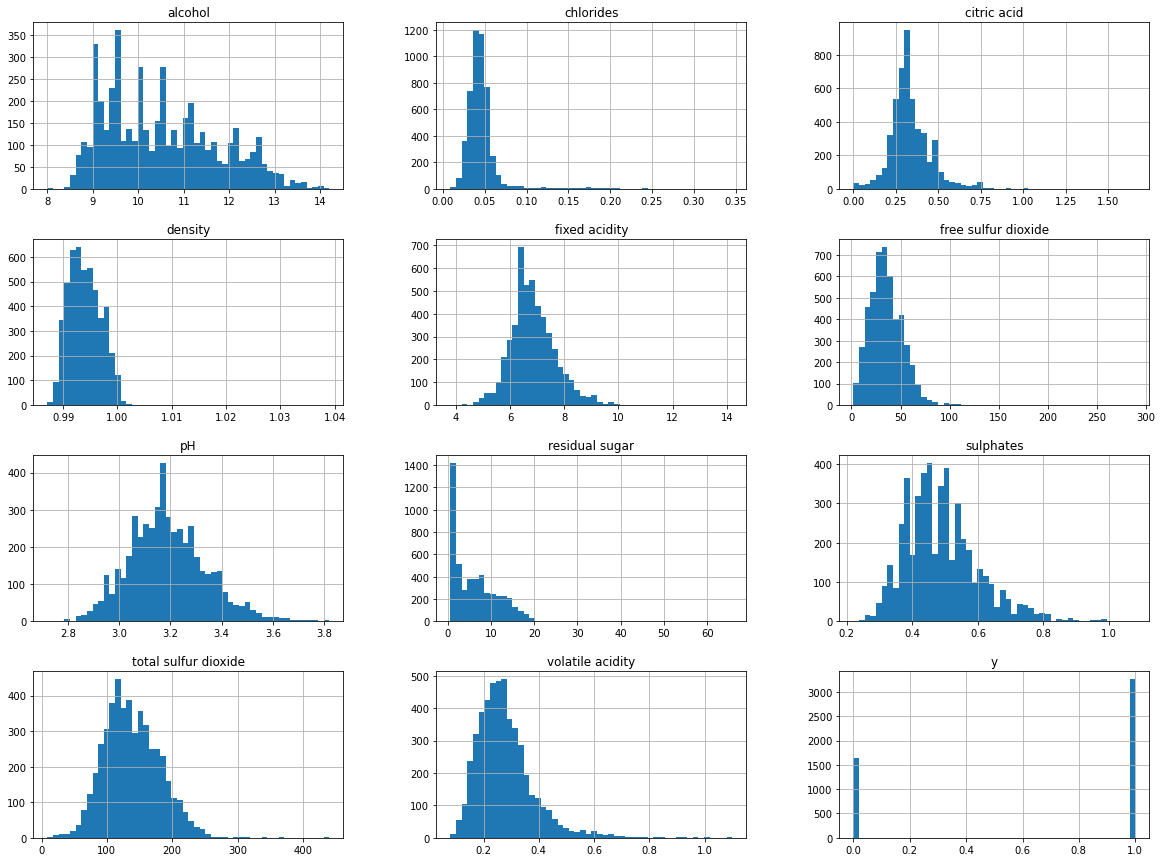

In [37]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15));

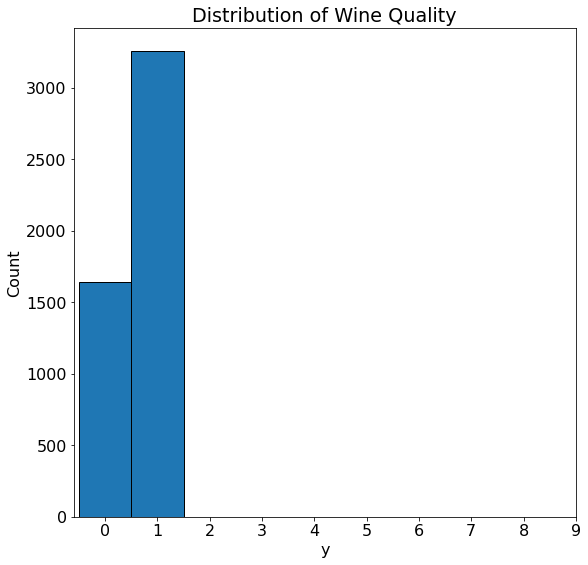

In [38]:

# Import Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9, 9)

# Bar plot of grades
plt.bar(df['y'].value_counts().index, 
        df['y'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('y'); 
plt.ylabel('Count'); 
plt.title('Distribution of Wine Quality');
plt.xticks(list(range(0, 10)));

6) You need to identify and report the redundant features


7) Drop the redundant features and implement the steps up to 13 (you need to
perform grid search in step 10 just once). See whether dropping features
improves the performance measures (e.g., F1 score). If not then keep the features.
You need to understand that having highly correlated features will not contribute
towards meaningful distance calculation. Moreover, it will increase the timecomplexity. You will have to determine this experimentally. 

In [39]:
#Redundancy might be  giving in ph, fixed acitity, volatitle acidity, citric acid 
# MIGHht all be not informative(Similarity)

In [40]:
# Method 1: Look at the correlation
df.corr()['y'].abs().sort_values(ascending=False)

y                       1.000000
alcohol                 0.383280
density                 0.268696
volatile acidity        0.225440
chlorides               0.183939
total sulfur dioxide    0.170924
residual sugar          0.092756
fixed acidity           0.089749
pH                      0.083687
sulphates               0.051858
free sulfur dioxide     0.001278
citric acid             0.000700
Name: y, dtype: float64

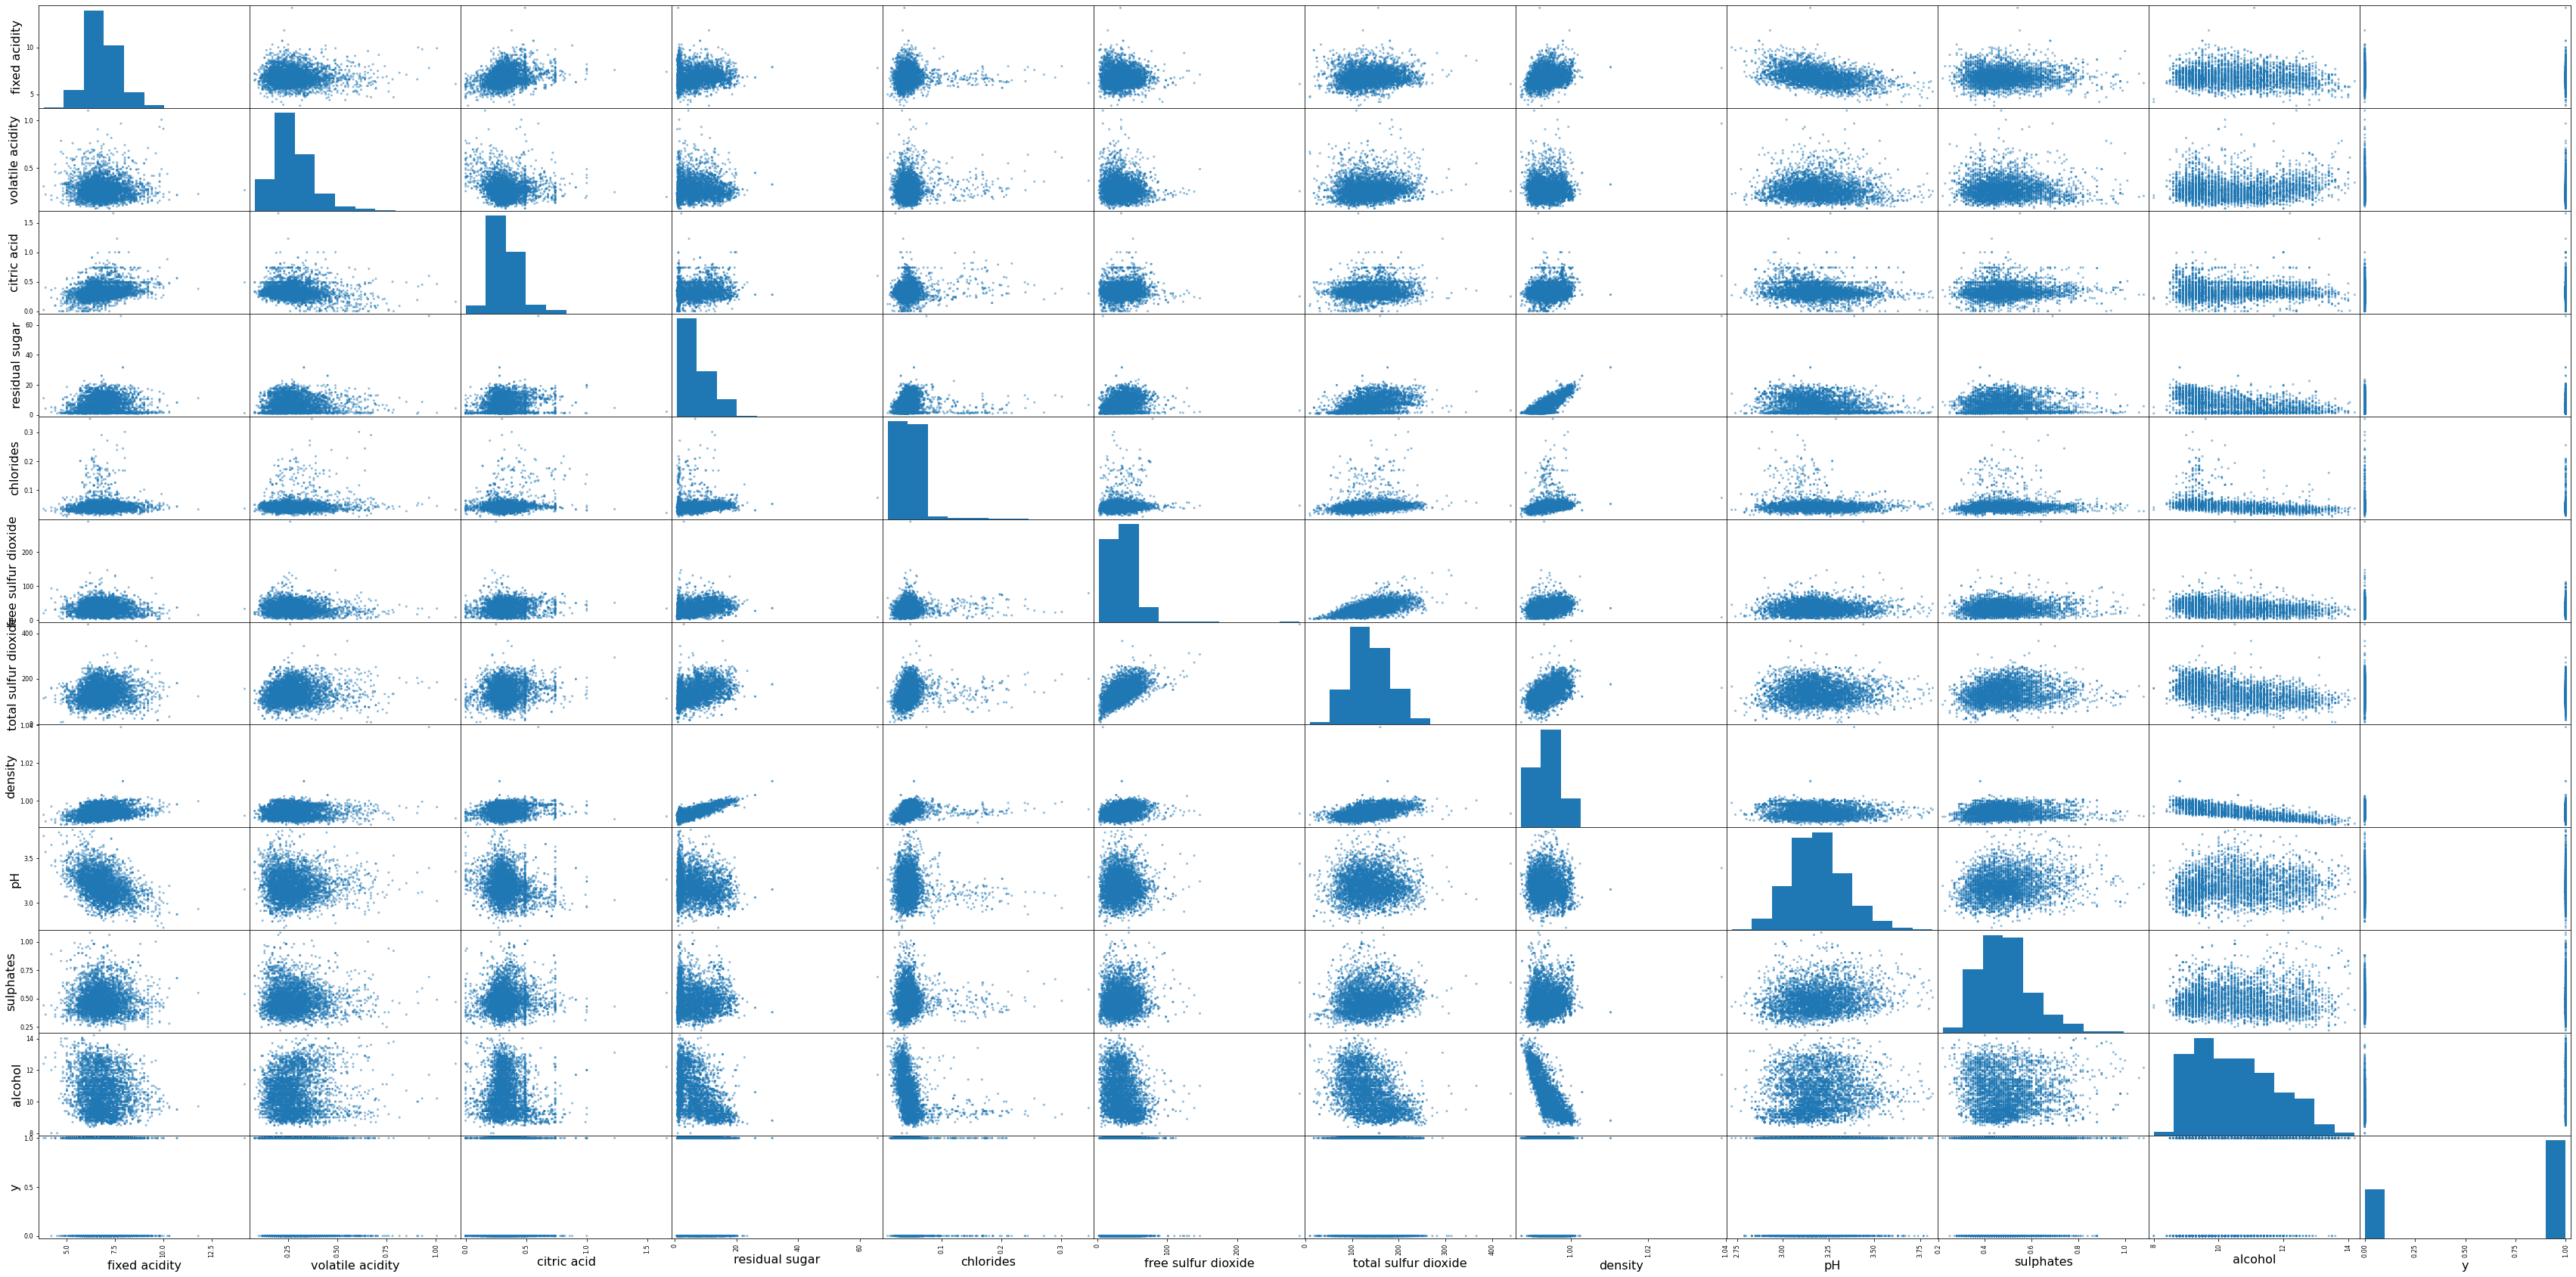

In [41]:
# Plot scatter matrix to visualize Correlation
# Takes a while
from pandas.plotting import scatter_matrix


attributes = df.columns

scatter_matrix(df[attributes], figsize=(60, 30));

In [42]:
## Method 2: 
## Mutual Information between a feature and target for all features
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mi_series = pd.Series(mutual_info)
mi_series.index = X.columns

mi_series.sort_values(ascending=False)


NameError: name 'X' is not defined

In [ ]:
#Only feature with best MI 
from sklearn.feature_selection import SelectKBest
k_best_features = SelectKBest(mutual_info_classif, k=5).fit(X, y)
indxBest = X.columns[k_best_features.get_support()]
indxBest

In [ ]:
#TO:DO
# Feature Selection using Forward search( Since #features is only 11)
# Complexity(Naive Way):O(N^2) i.e run KNN for features squares times



In [ ]:
features = ['volatile acidity', 'density', 'pH', 'sulphates', 'alcohol']
best_df= df[features]

In [ ]:
y= df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(best_df, y, test_size=0.2, random_state=0)

In [ ]:
X_train.describe()

In [ ]:
from sklearn.preprocessing import scale
X_train = scale(X_train)
X_test = scale(X_test)

In [ ]:
# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 15, 21, 23, 33, 35, 37], 'p': [1, 2, 10, 100], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=10, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

In [43]:
import numpy as np;
param_grid_optimal = {'n_neighbors': 33, 'p': 100, 'weights': 'distance'}
# With the Mahalanobis distance metric only the brute force algorithm works
#knn = KNeighborsClassifier(weights=?, algorithm='brute', n_neighbors=?, metric = "mahalanobis", metric_params= {'V': ?})

# Minkowski distance metric based optimal model selected via hyperparameter tuning.
# The Minkowski distance based model (i.e., knn_cv) is already trained with the optimal hyperparameter values.
# We can use the optimal model (knn_cv) for prediction.
# Or we can use the optimal hyperparameter values to train a new model, as follows.

knn = KNeighborsClassifier(**param_grid_optimal)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  0.9997447677386422


In [ ]:
#Steps up until 12 were done previously, step 13 onward needs to be done.